In [175]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
# from Week3.planar_utils import *
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)

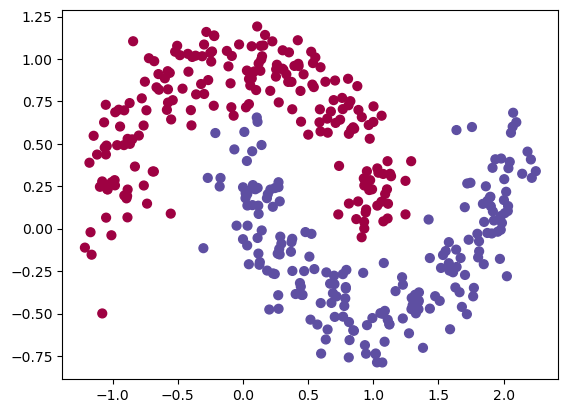

In [176]:
X, Y = load_planar_dataset()

plt.scatter(X[0, :], X[1, :], c = Y.reshape(X[0,:].shape), s = 40, cmap = plt.cm.Spectral)
plt.show()

In [177]:
print("The shape of X is "+ str(X.shape))
print("The shape of Y is "+ str(Y.shape))
print("I have %d training examples"%(X.shape[1]))

The shape of X is (2, 400)
The shape of Y is (1, 400)
I have 400 training examples


In [178]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

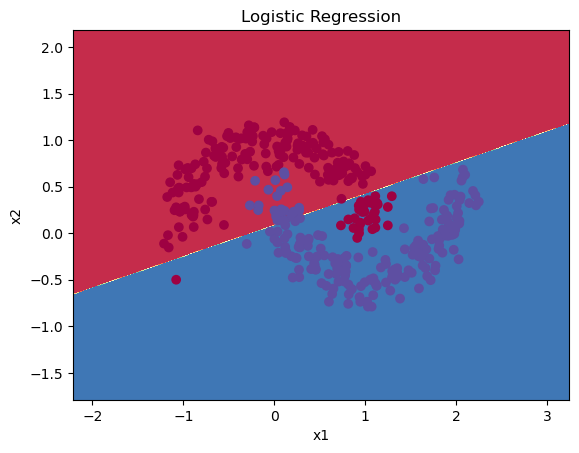

Accuracy of logistic regression: 84 % (percentage of correctly labelled datapoints)


C:\Users\bilbo\AppData\Local\Temp\ipykernel_7388\979178629.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +


In [179]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")
plt.show()
# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [180]:
# define layer sizes
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]

    return (n_x, n_h, n_y)

X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)

print(n_x, n_h, n_y)

2 4 1


In [181]:
# initialize_parameters function
def initialize_parameters(n_x, n_h, n_y):
    W_1 = np.random.randn(n_h, n_x) * 0.01
    b_1 = np.zeros((n_h, 1))
    W_2 = np.random.randn(n_y, n_h) * 0.01
    b_2 = np.zeros((n_y, 1))

    parameters = {
        "W_1": W_1,
        "b_1": b_1,
        "W_2": W_2,
        "b_2": b_2
    }

    return parameters

n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)

print("W_1 = " + str(parameters["W_1"]))
print("b_1 = " + str(parameters["b_1"]))
print("W_2 = " + str(parameters["W_2"]))
print("b_2 = " + str(parameters["b_2"]))

W_1 = [[0.00410599 0.00144044]
 [0.01454274 0.00761038]
 [0.00121675 0.00443863]
 [0.00333674 0.01494079]]
b_1 = [[0.]
 [0.]
 [0.]
 [0.]]
W_2 = [[-0.00205158  0.00313068 -0.00854096 -0.0255299 ]]
b_2 = [[0.]]


In [182]:
# forward_propagation function
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

def forward_propagation(X, parameters):
    Z_1 = np.dot(parameters["W_1"], X) + parameters["b_1"]
    A_1 = np.tanh(Z_1)
    Z_2 = np.dot(parameters["W_2"], A_1) + parameters["b_2"]
    A_2 = sigmoid(Z_2)

    cache = {
        "Z_1": Z_1,
        "A_1": A_1,
        "Z_2": Z_2,
        "A_2": A_2
    }

    return A_2, cache

X_assess = forward_propagation_test_case()
A_2, cache = forward_propagation(X_assess, parameters)
print(A_2.shape)

print(np.mean(cache["Z_1"]), np.mean(cache["A_1"]), np.mean(cache["Z_2"]), np.mean(cache["A_2"]))

(1, 3)
0.01349527800897604 0.013490434821613025 -0.0004769477787851103 0.4998807630650414


In [183]:
# compute_cost function
def compute_cost(A2, Y):
    logprobs = Y * np.log(abs(A2)) + (1 - Y) * np.log(abs(1 - A2))
    cost = - np.sum(logprobs) / Y.shape[1]
    cost = np.squeeze(cost)

    return cost

Y_assess = compute_cost_test_case()
print(A_2.shape)
cost = compute_cost(A_2, Y_assess)
print(Y_assess)
print(A_2)
print("cost = " + str(cost))
print(cost)

(1, 3)
[[1.76405235 0.40015721 0.97873798]]
[[0.49975109 0.49980816 0.50008304]]
cost = 0.6934882218031885
0.6934882218031885


In [184]:
def backward_propagation(parameters, cache, X_assess, Y_assess):
    m = X_assess.shape[1]
    W_1 = parameters['W_1']
    W_2 = parameters['W_2']
    A_1 = cache['A_1']
    A_2 = cache['A_2']

    d_Z2 = A_2 - Y_assess
    d_W2 = 1 / m * np.dot(d_Z2, A_1.T)
    d_b2 = 1 / m * np.sum(d_Z2, axis = 1, keepdims = True)
    d_Z1 = np.multiply(np.dot(W_2.T, d_Z2), 1- np.power(A_1, 2))
    d_W1 = 1 / m * np.dot(d_Z1, X_assess.T)
    d_b1 = 1 / m * np.sum(d_Z1, axis = 1, keepdims = True)
    grads = {'d_W1': d_W1,
             'd_b1': d_b1,
             'd_W2': d_W2,
             'd_b2': d_b2}
    return grads


In [185]:
grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("d_W1 = "+ str(grads["d_W1"]))
print ("d_b1 = "+ str(grads["d_b1"]))
print ("d_W2 = "+ str(grads["d_W2"]))
print ("d_b2 = "+ str(grads["d_b2"]))

d_W1 = [[ 0.00181815  0.00149012]
 [-0.00277047 -0.00226892]
 [ 0.0075689   0.00620326]
 [ 0.0225975   0.01851015]]
d_b1 = [[ 0.0011237 ]
 [-0.0017125 ]
 [ 0.00467795]
 [ 0.01396802]]
d_W2 = [[-0.00468534 -0.01840672 -0.00430251 -0.01380253]]
d_b2 = [[-0.54776842]]


In [186]:
def update_parameters(parameters, grads, learning_rate):
    W_1 = parameters["W_1"]
    b_1 = parameters["b_1"]
    W_2 = parameters["W_2"]
    b_2 = parameters["b_2"]

    d_W1 = grads["d_W1"]
    d_b1 = grads["d_b1"]
    d_W2 = grads["d_W2"]
    d_b2 = grads["d_b2"]

    W_1 -= learning_rate * d_W1
    b_1 -= learning_rate * d_b1
    W_2 -= learning_rate * d_W2
    b_2 -= learning_rate * d_b2

    new_parameters = {
        "W_1": W_1,
        "b_1": b_1,
        "W_2": W_2,
        "b_2": b_2,
    }

    return new_parameters

In [187]:
learning_rate = 1.2
new_parameters = update_parameters (parameters, grads, learning_rate)

print(parameters)
print(new_parameters['W_1'] - parameters['W_1'])

{'W_1': array([[ 0.00192421, -0.00034771],
       [ 0.0178673 ,  0.01033308],
       [-0.00786593, -0.00300528],
       [-0.02378026, -0.00727139]]), 'b_1': array([[-0.00134844],
       [ 0.002055  ],
       [-0.00561354],
       [-0.01676162]]), 'W_2': array([[ 0.00357082,  0.02521875, -0.00337795, -0.00896686]]), 'b_2': array([[0.6573221]])}
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [188]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)

    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)
    W_1 = parameters['W_1']
    b_1 = parameters['b_1']
    W_2 = parameters['W_2']
    b_2 = parameters['b_2']

    for i in range(num_iterations):
        A_2, cache = forward_propagation(X, parameters)

        cost = compute_cost(A_2, Y)

        grads = backward_propagation(parameters, cache, X, Y)

        parameters = update_parameters(parameters, grads, 0.01)

        if print_cost == True and i % 1000 == 0:
            print('Cost after iteration %i: %f' % (i, cost))

    return parameters



In [189]:
np.random.seed(1)
X_assess = np.random.randn(2, 3)
Y_assess = np.random.randn(1, 3)

parameters = nn_model(X_assess, Y_assess, 4, 10000, False)
print("W_1 = " + str(parameters["W_1"]))
print("b_1 = " + str(parameters["b_1"]))
print("W_2 = " + str(parameters["W_2"]))
print("b_2 = " + str(parameters["b_2"]))

C:\Users\bilbo\AppData\Local\Temp\ipykernel_7388\3312981428.py:3: RuntimeWarning: divide by zero encountered in log
  logprobs = Y * np.log(abs(A2)) + (1 - Y) * np.log(abs(1 - A2))


W_1 = [[ 3.45850529 -0.93110015]
 [ 2.70110007 -1.97237524]
 [-3.46894634  0.92798737]
 [ 2.89218738 -1.79298186]]
b_1 = [[-1.72077063]
 [-1.29556574]
 [ 1.72082856]
 [-1.35630982]]
W_2 = [[ 48.23304552  47.80854157 -48.33428059  48.20605325]]
b_2 = [[-1.00250867]]


In [190]:
def predict(parameters, X):
    A_2, cache = forward_propagation(X, parameters)
    predictions = np.round(A_2)

    return predictions


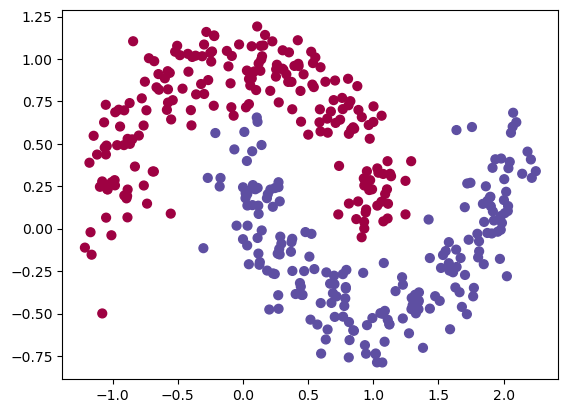

In [ ]:
X, Y = load_planar_dataset()

plt.scatter(X[0, :], X[1, :], c = Y.reshape(X[0,:].shape), s = 40, cmap = plt.cm.Spectral)
plt.show()

Cost after iteration 0: 0.693158
Cost after iteration 1000: 0.675171
Cost after iteration 2000: 0.389421
Cost after iteration 3000: 0.310552
Cost after iteration 4000: 0.291444
Cost after iteration 5000: 0.286825
Cost after iteration 6000: 0.285574
Cost after iteration 7000: 0.285124
Cost after iteration 8000: 0.284879
Cost after iteration 9000: 0.284691


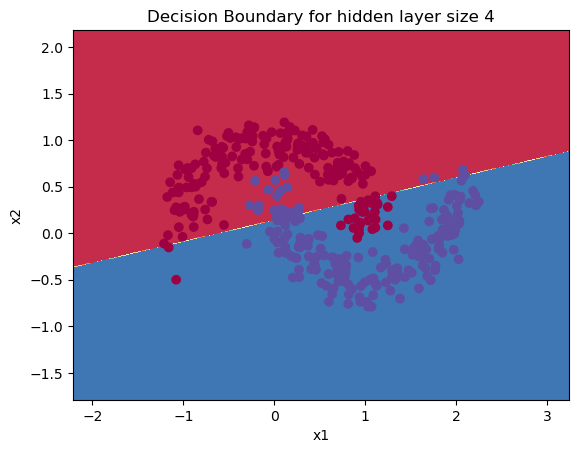

Accuracy: 84%


C:\Users\bilbo\AppData\Local\Temp\ipykernel_7388\2594831825.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


In [194]:
parameters = nn_model(X, Y, 4, num_iterations=10000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))
plt.show()


predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')